In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from sklearn.metrics import auc, precision_recall_curve, roc_curve, confusion_matrix, average_precision_score
import os
from tqdm import tqdm
import json

In [18]:
dataset_counts = [672, 500, 400, 300, 200, 100]
folds = [0, 1, 2, 3, 4]
# init stats dict
stats = {
    d:{
        f: {
            y: [] for y in ["y_true", "y_pred", "y_prob"]} 
        for f in folds} 
    for d in dataset_counts
}

# Read predictions files

In [19]:
for dataset_count in dataset_counts:
    for cur_fold in folds:
        pred_filepath = os.path.join(
            'predictions', 
            'figure_3_dataset_{}'.format(dataset_count), 
            'model_predictions_{}_fold_{}'.format(dataset_count, cur_fold)
        )
        with open(pred_filepath, 'r') as f:
            lines = [l.strip().split(',') for l in f.readlines()]
            
        for l in lines[1:]:
            stats[dataset_count][cur_fold]["y_true"].append(int(l[0]))
            stats[dataset_count][cur_fold]["y_pred"].append(int(l[1]))
            stats[dataset_count][cur_fold]["y_prob"].append(float(l[2]))

# Average Precision for Each Dataset

In [133]:
average_precisions = []
for dataset_count in dataset_counts:
    cur_avg_precisions = []
    for cur_fold in folds:
        average_precision = average_precision_score(
            stats[dataset_count][cur_fold]['y_true'], 
            stats[dataset_count][cur_fold]['y_prob']
        )
        cur_avg_precisions.append(average_precision)
    average_precisions.append(cur_avg_precisions)

    

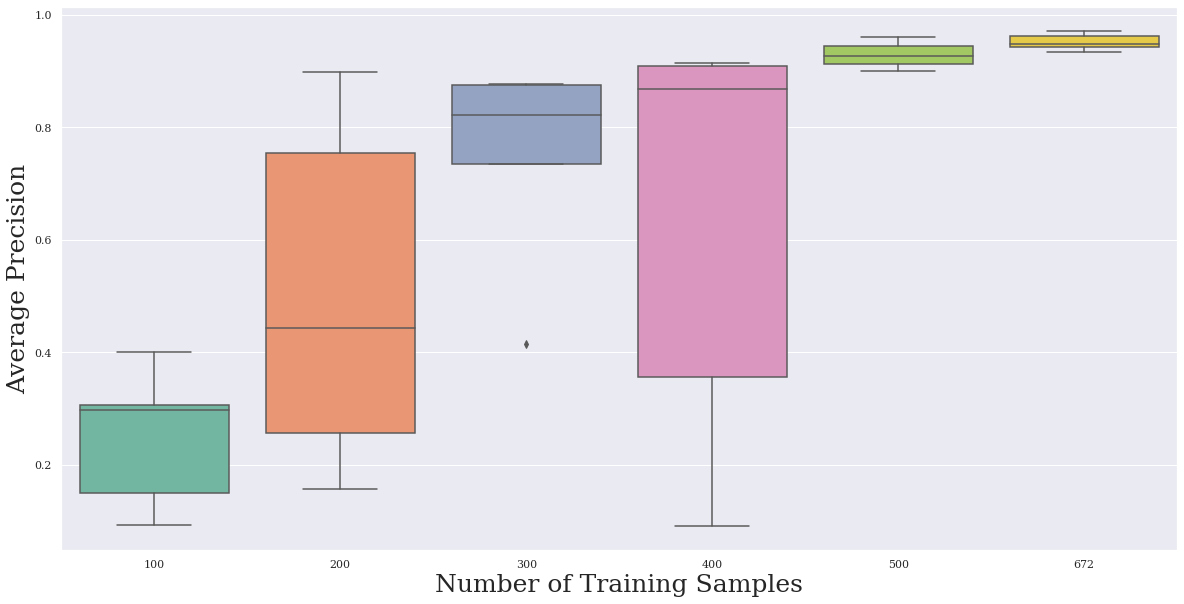

In [135]:
sns.set(rc={'figure.figsize':(20,10), 'font.size': 25, "axes.labelsize":25, 'font.family':'serif'})

sns.boxplot(
    x=dataset_counts, 
    y=average_precisions,
    palette=sns.color_palette("Set2", n_colors=6, desat=1)
).set(
    xlabel='Number of Training Samples', 
    ylabel='Average Precision',
)

plt.savefig(os.path.join("figures", "figure_6_average_precision_by_dataset_count.png"))

plt.show()

# Precision-Recall Curve

In [124]:
p, r, t = precision_recall_curve(
    stats[672][2]["y_true"],
    stats[672][2]["y_prob"],
)

In [128]:
p.std()

0.21815759413754374

In [129]:
p, r, t = precision_recall_curve(
    stats[672][1]["y_true"],
    stats[672][1]["y_prob"],
)

In [130]:
p.std()

0.2587696273514676

In [94]:
precision_recall_curve?

In [ ]:
for dataset_count in dataset_counts:
    ps, rs, ts = [], [], []
    for cur_fold in folds:
        p, r, t = precision_recall_curve(
            stats[dataset_count][cur_fold]["y_true"],
            stats[dataset_count][cur_fold]["y_prob"],
        )
        ps.append(p)
        rs.append(r)
        ts.append(t)
        
    precision = np.mean(ps)

    precision, recall, thresholds = precision_recall_curve(y_true, y_prob)

    average_precision = average_precision_score(y_true, y_prob)

    step_kwargs = {'step': 'post'}
    plt.plot(recall, precision, label='Model {}'.format(dataset_count))
    #plt.step(recall, precision, color='b', alpha=0.2, where='post')
    #plt.fill_between(recall, precision, alpha=0.1, **step_kwargs)

    plt.xlabel('Recall', labelpad=25)
    plt.ylabel('Precision', labelpad=25)
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.01])
    
plt.legend()

plt.savefig('figures/figure_4_pr_curve_comparison.png', bbox_inches='tight')
plt.savefig('figures/figure_4_pr_curve_comparison.eps', bbox_inches='tight')

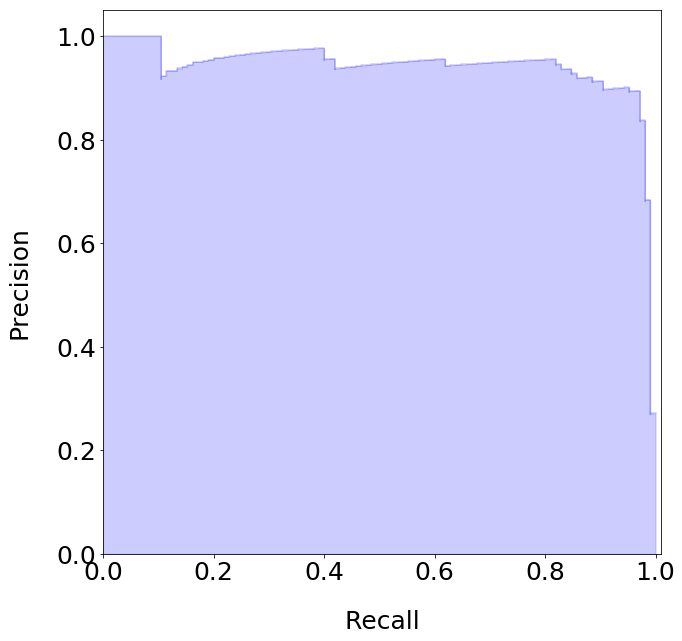

In [15]:
precision, recall, thresholds = precision_recall_curve(y_true, y_prob)

average_precision = average_precision_score(y_true, y_prob)

plt.figure(figsize=(10, 10))


step_kwargs = {'step': 'post'}
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall', labelpad=25)
plt.ylabel('Precision', labelpad=25)
plt.ylim([0, 1.05])
plt.xlim([0, 1.01])
#plt.title('Precision-Recall Curve: AP={0:0.4f}\n'.format(average_precision))
#plt.title('Precision-Recall Curve: Model 672\n'.format(dataset_count))
plt.savefig('figures/figure_3_dataset_{}/dataset_{}_PR_Curve.png'.format(dataset_count, dataset_count), bbox_inches='tight')
plt.savefig('figures/figure_3_dataset_{}/dataset_{}_PR_Curve.eps'.format(dataset_count, dataset_count), bbox_inches='tight')

# Confusion Matrix

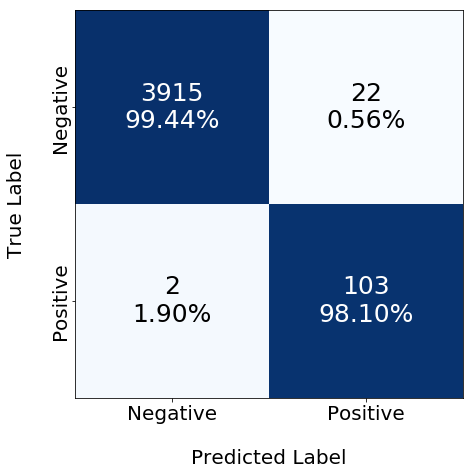

In [12]:
class_names = ['Negative', 'Positive']
cm = confusion_matrix(y_true, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10, 7))
im = ax.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set(
    xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=class_names,
    yticklabels=class_names,
    #title='Model {} Confusion Matrix\n'.format(dataset_count),
    ylabel='True Label',
    xlabel='Predicted Label',
)

ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 25

#plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.setp(ax.get_yticklabels(), rotation=90, ha='center', rotation_mode='anchor')

thresh = cm_norm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, "{}\n{:.2f}%".format(cm[i, j], cm_norm[i, j] * 100),
                ha="center", va="center",
                color="white" if cm_norm[i, j] > thresh else 'black',
                fontsize=25)
fig.tight_layout()
plt.savefig('figures/figure_3_dataset_{}/dataset_{}_Normalized_Confusion_Matrix.png'.format(dataset_count, dataset_count), bbox_inches='tight')
plt.savefig('figures/figure_3_dataset_{}/dataset_{}_Normalized_Confusion_Matrix.eps'.format(dataset_count, dataset_count), bbox_inches='tight')